# **Import Library yang dibutuhkan**

In [55]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_HOK_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,5,2024-06-20 03:02:19,Game nya bagus ga kalah bagus sama mobile legends
1,Pengguna Google,3,2024-06-20 03:02:15,Tambah kan pitur yang bisa oflen main sama kum...
2,Pengguna Google,5,2024-06-20 03:02:11,geme nya bagus
3,Pengguna Google,5,2024-06-20 03:02:01,mantab
4,Pengguna Google,5,2024-06-20 03:01:57,nice


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Game nya bagus ga kalah bagus sama mobile legends,Pengguna Google,2024-06-20 03:02:19
1,Tambah kan pitur yang bisa oflen main sama kum...,Pengguna Google,2024-06-20 03:02:15
2,geme nya bagus,Pengguna Google,2024-06-20 03:02:11
3,mantab,Pengguna Google,2024-06-20 03:02:01
4,nice,Pengguna Google,2024-06-20 03:01:57
...,...,...,...
2495,Mantap banyak skin free,Pengguna Google,2024-06-20 00:24:58
2496,ayok ramaikan agar player MLBB pindah ke sini ...,Pengguna Google,2024-06-20 00:24:56
2497,Moontoon cemas ko dek,Pengguna Google,2024-06-20 00:24:53
2498,Gem nya sagat ramah dan gaul,Pengguna Google,2024-06-20 00:24:50


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   2500 non-null   object
 1   userName  2500 non-null   object
 2   at        2500 non-null   object
dtypes: object(3)
memory usage: 58.7+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,2500,2500,2500
unique,2015,1,2188
top,mantap,Pengguna Google,2024-06-20 02:42:23
freq,55,2500,4


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2500, 3)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(2015, 3)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,game nya bagus ga kalah bagus sama mobile legends,Pengguna Google,2024-06-20 03:02:19
1,tambah kan pitur yang bisa oflen main sama kum...,Pengguna Google,2024-06-20 03:02:15
2,geme nya bagus,Pengguna Google,2024-06-20 03:02:11
3,mantab,Pengguna Google,2024-06-20 03:02:01
4,nice,Pengguna Google,2024-06-20 03:01:57
...,...,...,...
2495,mantap banyak skin free,Pengguna Google,2024-06-20 00:24:58
2496,ayok ramaikan agar player mlbb pindah ke sini ...,Pengguna Google,2024-06-20 00:24:56
2497,moontoon cemas ko dek,Pengguna Google,2024-06-20 00:24:53
2498,gem nya sagat ramah dan gaul,Pengguna Google,2024-06-20 00:24:50


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,game nya bagus ga kalah bagus sama mobile legends,Pengguna Google,2024-06-20 03:02:19
1,tambah kan pitur yang bisa oflen main sama kum...,Pengguna Google,2024-06-20 03:02:15
2,geme nya bagus,Pengguna Google,2024-06-20 03:02:11
3,mantab,Pengguna Google,2024-06-20 03:02:01
4,nice,Pengguna Google,2024-06-20 03:01:57
...,...,...,...
2495,mantap banyak skin free,Pengguna Google,2024-06-20 00:24:58
2496,ayok ramaikan agar player mlbb pindah ke sini ...,Pengguna Google,2024-06-20 00:24:56
2497,moontoon cemas ko dek,Pengguna Google,2024-06-20 00:24:53
2498,gem nya sagat ramah dan gaul,Pengguna Google,2024-06-20 00:24:50


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.5 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,game nya bagus ga kalah bagus sama mobile legends,Pengguna Google,2024-06-20 03:02:19
1,tambah kan pitur bisa oflen main sama kumputer,Pengguna Google,2024-06-20 03:02:15
2,geme nya bagus,Pengguna Google,2024-06-20 03:02:11
3,mantab,Pengguna Google,2024-06-20 03:02:01
4,nice,Pengguna Google,2024-06-20 03:01:57
...,...,...,...
2495,mantap banyak skin free,Pengguna Google,2024-06-20 00:24:58
2496,ayok ramaikan player mlbb pindah sini smua jip...,Pengguna Google,2024-06-20 00:24:56
2497,moontoon cemas ko dek,Pengguna Google,2024-06-20 00:24:53
2498,gem nya sagat ramah gaul,Pengguna Google,2024-06-20 00:24:50


# **Tokenize**

In [18]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0       [game, nya, bagus, ga, kalah, bagus, sama, mob...
1       [tambah, kan, pitur, bisa, oflen, main, sama, ...
2                                      [geme, nya, bagus]
3                                                [mantab]
4                                                  [nice]
                              ...                        
2495                         [mantap, banyak, skin, free]
2496    [ayok, ramaikan, player, mlbb, pindah, sini, s...
2497                           [moontoon, cemas, ko, dek]
2498                       [gem, nya, sagat, ramah, gaul]
2499    [terakhir, main, versi, web, sekarang, ada, pl...
Name: content, Length: 2015, dtype: object

# **Stemming**

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_HOK_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_HOK_1.csv', encoding = 'latin1')
df_clean

,content
0,game nya bagus ga kalah bagus sama mobile legends
1,tambah kan pitur bisa oflen main sama kumputer
2,geme nya bagus
3,mantab
4,nice
...,...
2010,mantap banyak skin free
2011,ayok ramai player mlbb pindah sini smua jipak ...
2012,moontoon cemas ko dek
2013,gem nya sagat ramah gaul


# **Translate**

In [21]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# # Load Data Hasil Stemming

# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_HOK_1.csv', encoding='latin1')

In [24]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# # Imputing NaN Values

# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_HOK_1.csv')

In [28]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_HOK_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,game nya bagus ga kalah bagus sama mobile legends,It's a good game. It doesn't lose. It's good w...
1,1,tambah kan pitur bisa oflen main sama kumputer,add a pitur can oflen play with kuputer
2,2,geme nya bagus,That's a nice camera.
3,3,mantab,That's great.
4,4,nice,Nice.
...,...,...,...
2010,2010,mantap banyak skin free,steady lots of skin free
2011,2011,ayok ramai player mlbb pindah sini smua jipak ...,"fontcolor="" # FFFF00""let'sloadof playermlbb fo..."
2012,2012,moontoon cemas ko dek,Moontoon anxious ko deck
2013,2013,gem nya sagat ramah gaul,His fanfare is so friendly.


# **Labeling**

In [29]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_HOK_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,game nya bagus ga kalah bagus sama mobile legends,It's a good game. It doesn't lose. It's good w...
1,1,tambah kan pitur bisa oflen main sama kumputer,add a pitur can oflen play with kuputer
2,2,geme nya bagus,That's a nice camera.
3,3,mantab,That's great.
4,4,nice,Nice.
...,...,...,...
2010,2010,mantap banyak skin free,steady lots of skin free
2011,2011,ayok ramai player mlbb pindah sini smua jipak ...,"fontcolor="" # FFFF00""let'sloadof playermlbb fo..."
2012,2012,moontoon cemas ko dek,Moontoon anxious ko deck
2013,2013,gem nya sagat ramah gaul,His fanfare is so friendly.


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 1111
Netral = 622
Negatif = 282

Total Data Seluruhnya : 2015


In [33]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,game nya bagus ga kalah bagus sama mobile legends,It's a good game. It doesn't lose. It's good w...,Positif
1,1,tambah kan pitur bisa oflen main sama kumputer,add a pitur can oflen play with kuputer,Netral
2,2,geme nya bagus,That's a nice camera.,Positif
3,3,mantab,That's great.,Positif
4,4,nice,Nice.,Positif
...,...,...,...,...
2010,2010,mantap banyak skin free,steady lots of skin free,Positif
2011,2011,ayok ramai player mlbb pindah sini smua jipak ...,"fontcolor="" # FFFF00""let'sloadof playermlbb fo...",Netral
2012,2012,moontoon cemas ko dek,Moontoon anxious ko deck,Negatif
2013,2013,gem nya sagat ramah gaul,His fanfare is so friendly.,Positif


In [34]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,game nya bagus ga kalah bagus sama mobile legends,It's a good game. It doesn't lose. It's good w...,Positif
1,tambah kan pitur bisa oflen main sama kumputer,add a pitur can oflen play with kuputer,Netral
2,geme nya bagus,That's a nice camera.,Positif
3,mantab,That's great.,Positif
4,nice,Nice.,Positif
...,...,...,...
2010,mantap banyak skin free,steady lots of skin free,Positif
2011,ayok ramai player mlbb pindah sini smua jipak ...,"fontcolor="" # FFFF00""let'sloadof playermlbb fo...",Netral
2012,moontoon cemas ko dek,Moontoon anxious ko deck,Negatif
2013,gem nya sagat ramah gaul,His fanfare is so friendly.,Positif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



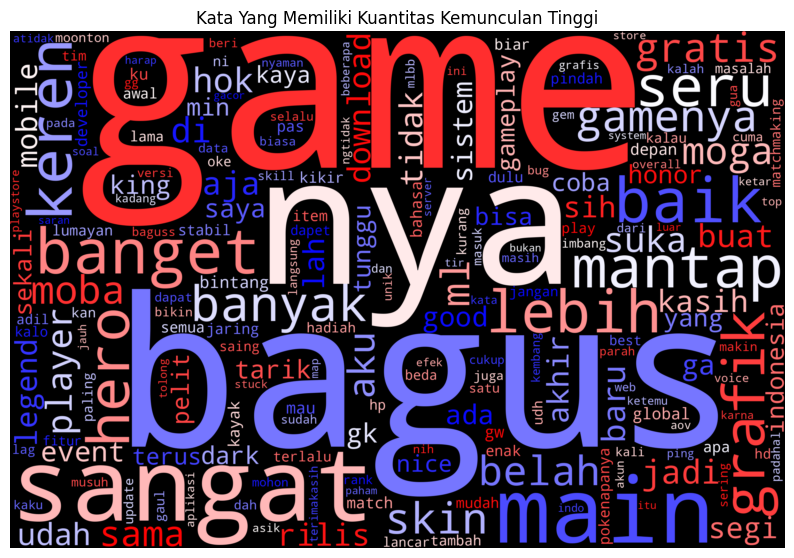

In [35]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


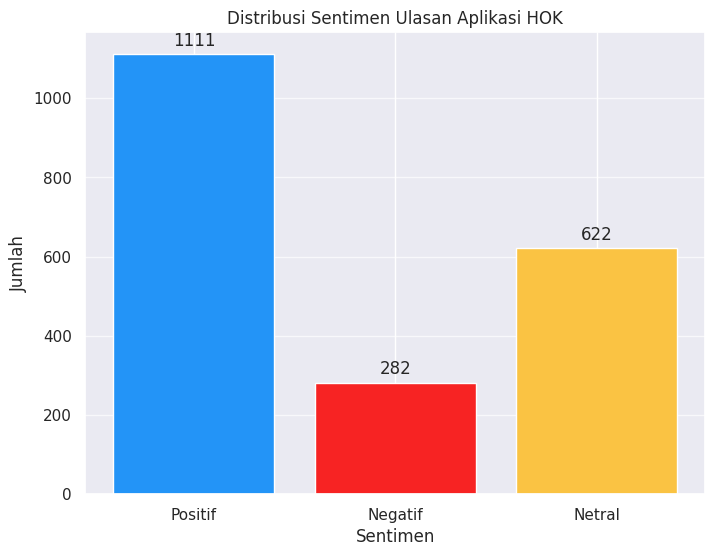

In [36]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi HOK")


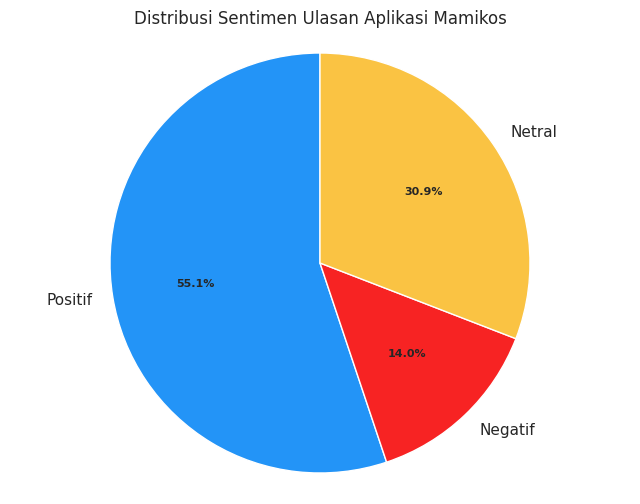

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Mamikos")

In [38]:
# Menghapus Sentimen Netral

data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,game nya bagus ga kalah bagus sama mobile legends,It's a good game. It doesn't lose. It's good w...,Positif
2,geme nya bagus,That's a nice camera.,Positif
3,mantab,That's great.,Positif
4,nice,Nice.,Positif
5,game bagus,Nice game.,Positif
...,...,...,...
2007,bagus munggain depan di perbaikin masalah siny...,"fontcolor="" # FFFF00""goodendheadend fixthe pro...",Positif
2009,nice app game,nice app game,Positif
2010,mantap banyak skin free,steady lots of skin free,Positif
2012,moontoon cemas ko dek,Moontoon anxious ko deck,Negatif


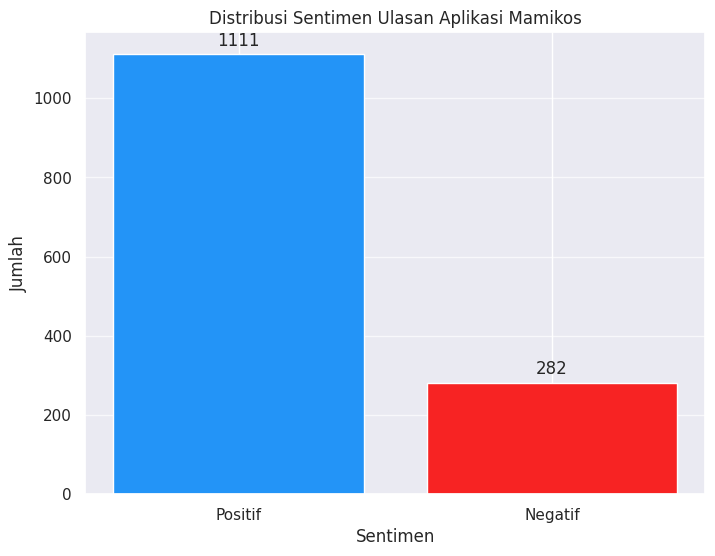

In [39]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Mamikos")


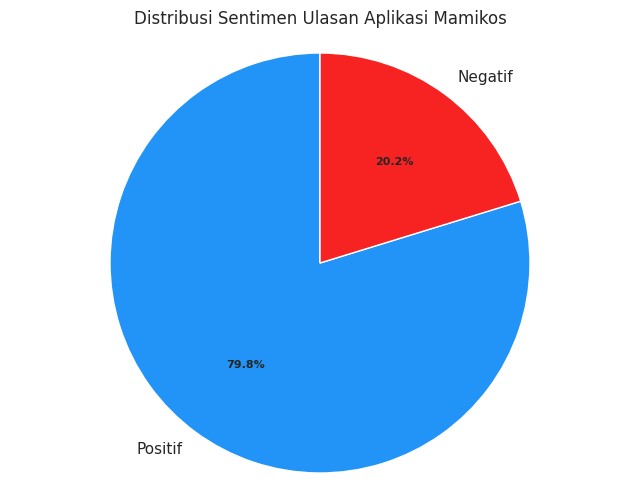

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Mamikos")

In [41]:
# Replace Data Sentimen

data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
0,game nya bagus ga kalah bagus sama mobile legends,It's a good game. It doesn't lose. It's good w...,0
2,geme nya bagus,That's a nice camera.,0
3,mantab,That's great.,0
4,nice,Nice.,0
5,game bagus,Nice game.,0
...,...,...,...
2007,bagus munggain depan di perbaikin masalah siny...,"fontcolor="" # FFFF00""goodendheadend fixthe pro...",0
2009,nice app game,nice app game,0
2010,mantap banyak skin free,steady lots of skin free,0
2012,moontoon cemas ko dek,Moontoon anxious ko deck,1


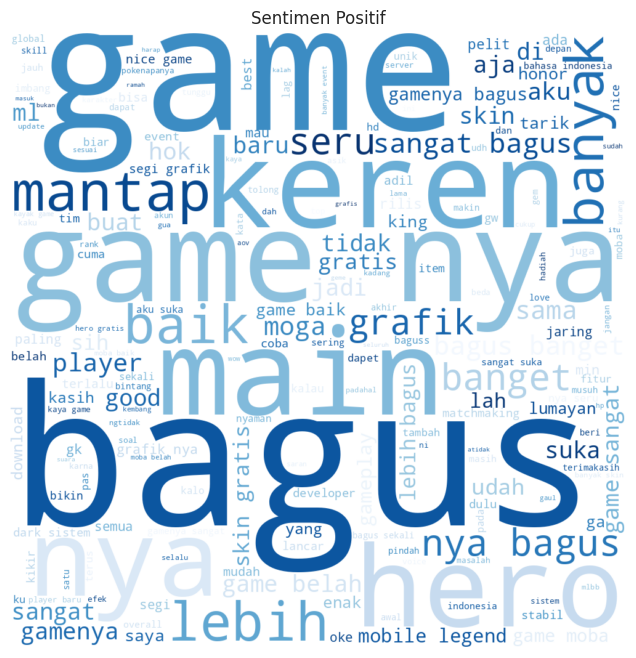

In [47]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

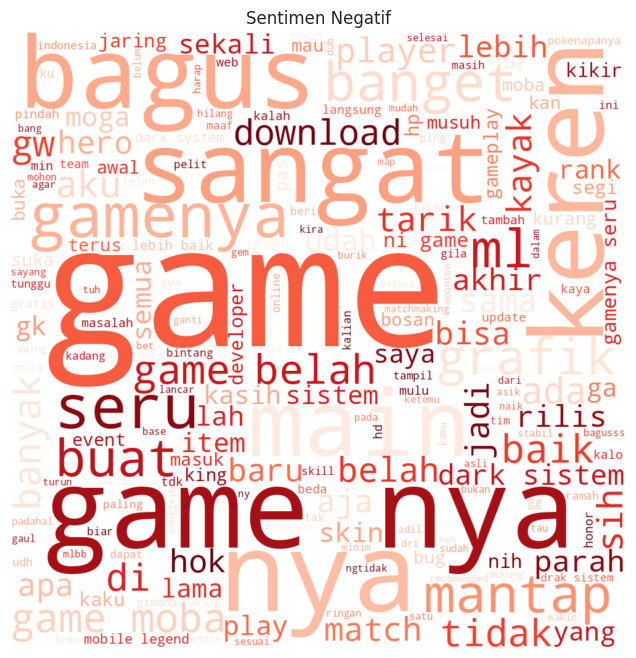

In [48]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

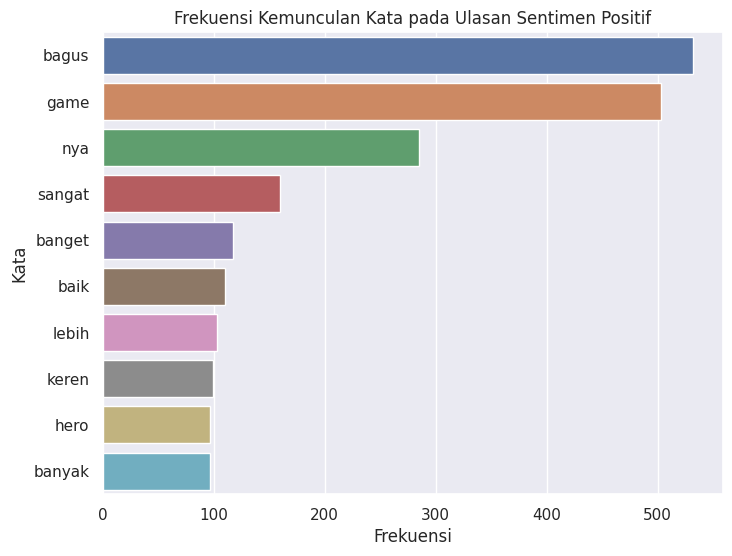

In [56]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data[data['sentimen'] == 0]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [57]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

  kata  frekuensi
 bagus        532
  game        503
   nya        285
sangat        160
banget        117
  baik        110
 lebih        103
 keren         99
  hero         97
banyak         97


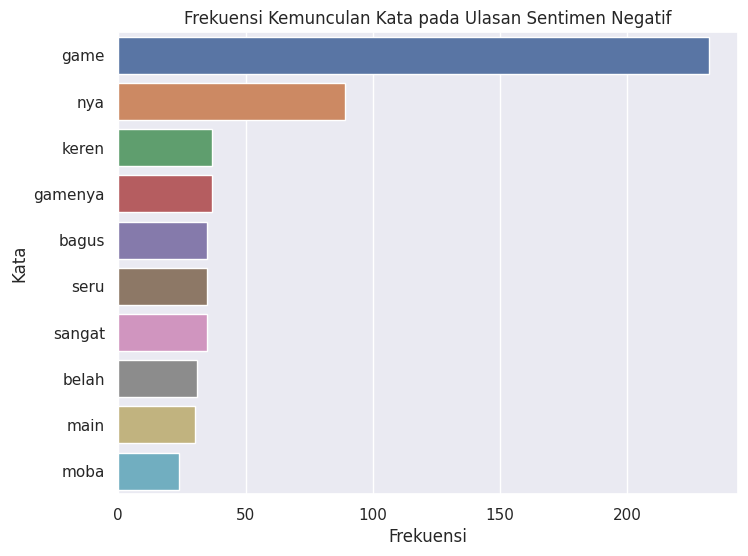

In [58]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data[data['sentimen'] == 1]['content'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [59]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

   kata  frekuensi
   game        232
    nya         89
  keren         37
gamenya         37
  bagus         35
   seru         35
 sangat         35
  belah         31
   main         30
   moba         24


In [60]:
# Menghitung Jumlah Sentimen Positif & Negatif

data['sentimen'].value_counts()

sentimen
0    1111
1     282
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [61]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [62]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [63]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

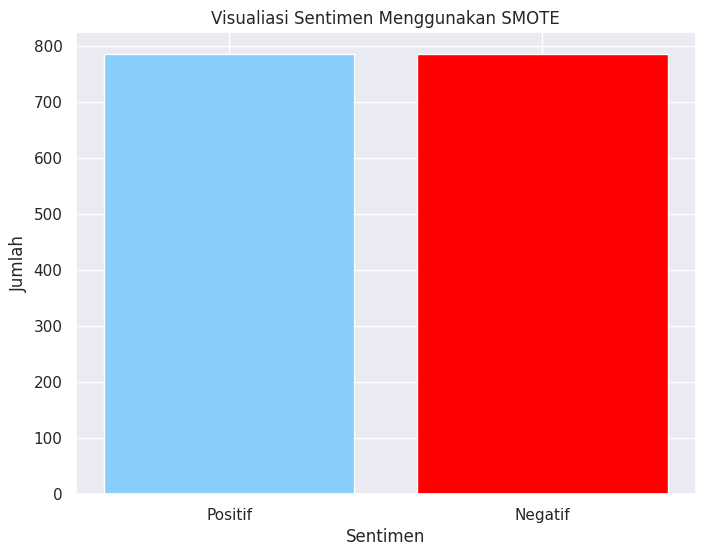

In [64]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [65]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [66]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8181818181818182
Akurasi untuk c = 0.05: 0.8277511961722488
Akurasi untuk c = 0.25: 0.8253588516746412
Akurasi untuk c = 0.5: 0.8277511961722488
Akurasi untuk c = 0.75: 0.8277511961722488
Akurasi untuk c = 1: 0.8277511961722488


In [68]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [69]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8277511961722488 


In [70]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.8278

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       326
           1       0.60      0.65      0.63        92

    accuracy                           0.83       418
   macro avg       0.75      0.76      0.76       418
weighted avg       0.83      0.83      0.83       418



In [71]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[286  40]
 [ 32  60]]

True Positives (TP) =  286

True Negatives (TN) =  60

False Positives (FP) =  40

False Negatives (FN) =  32

Accuracy =  0.8277511961722488


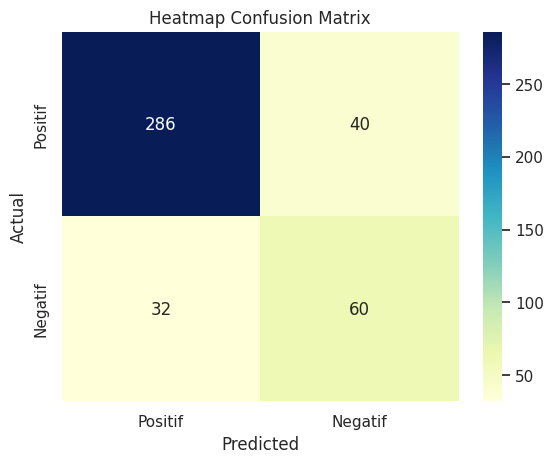

In [72]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [73]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [74]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8278


In [75]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1722


# **Testing**

In [77]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Game mantap banget dan grafik juga lumayan lah pertahankan grafik dan pertandingan ya dan skin y pada gratis semua bukan kayak game sebelah wkwkwk
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 77.56%
Probabilitas: 77.56053718777143 %
